In [1]:
from quantumnet.components import Network, Host , Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger
from quantumnet.components.simulation import ClassificadorQML  

import pennylane as qml
from pennylane import numpy as np
import torch
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit


Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


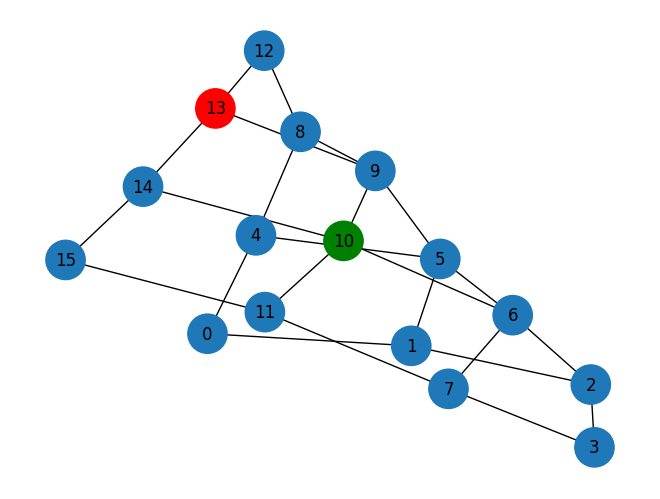

Final Slice Paths for 1 slices: [[13, 9, 10]]


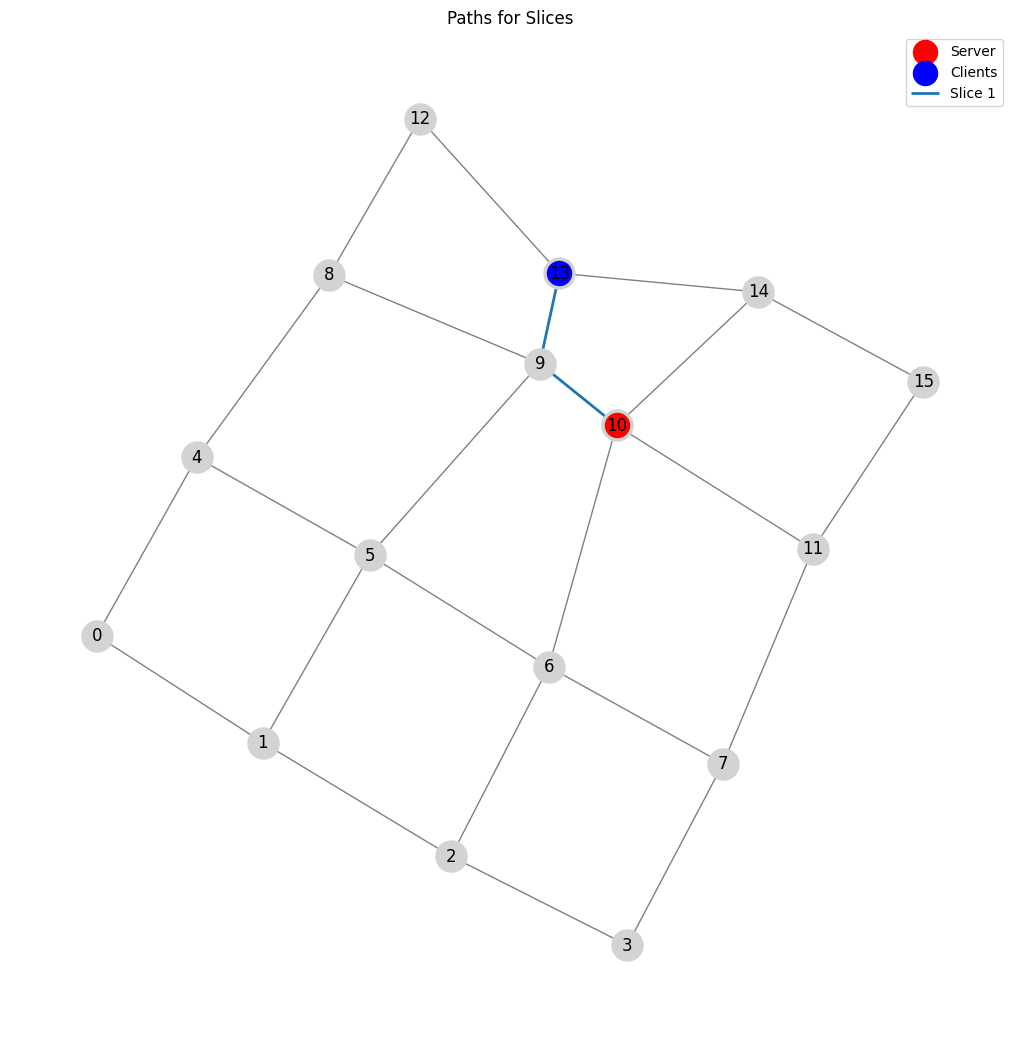

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
#13,8,2,6,0,3,11,15
clients = [13]
server = 10
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)

In [3]:
# # **Definições do Circuito Quântico**
# num_qubits = 8  # Número de qubits usados no protocolo
# num_camadas = 32  # Profundidade do circuito (camadas)

# # Criando a instância do modelo quântico
# modelo_qml = ClassificadorQML(dim_entrada=256, dim_saida=4, num_qubits=num_qubits, num_camadas=num_camadas)

# # **Gerando o circuito do modelo e convertendo para Qiskit**
# circuito_quantico = modelo_qml.gerar_qiskit_circuit()

# # **Executando a Aplicação na Rede**
# rede.application_layer.run_app(
#     "AC_BQC",
#     alice_id=6,
#     bob_id=0,
#     num_qubits=num_qubits,
#     scenario=2,
#     circuit_depth=num_camadas,  # Número de camadas como profundidade do circuito
#     circuit_data=circuito_quantico  # Passando o circuito convertido
# )


In [4]:
# Criando a instância do modelo quântico
modelo_qml = ClassificadorQML(dim_entrada=256, dim_saida=4, num_qubits=8, num_camadas=32)

# **Gerando o circuito do modelo e convertendo para Qiskit**
circuito_quantico = modelo_qml.gerar_qiskit_circuit()
circuito_quantico.draw()

# # Pegando o número correto de qubits e a profundidade do circuito
# num_qubits = modelo_qml.num_qubits  
# circuit_depth = modelo_qml.num_camadas  

# protocols = ["AC_BQC"]
# clients = [13]
# server = 10

# # Simulação de slices
# slice_paths_list = rede.run_slice_simulation(clients=clients, server=server)

# # Inicializa slices
# controlador.initialize_slices(
#     network=rede,
#     clients=clients,
#     server=server,
#     protocols=protocols,
#     slice_paths_list=slice_paths_list
# )

# # Criando 1 requisição com o circuito do modelo quântico
# num_requests = 1
# requests = []

# for i in range(num_requests):
#     client_index = i % len(clients)
#     alice_id = clients[client_index]
#     protocol = protocols[client_index]
#     slice_path = slice_paths_list[client_index]
#     bob_id = server

#     # **Agora passamos o circuito personalizado corretamente**
#     request = rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,  
#         num_gates=None,  
#         protocol=protocol,
#         slice_path=slice_path,
#         scenario=2,
#         custom_circuit=circuito_quantico  
#     )
    
#     requests.append(request)

# # Agendamento de requisições
# scheduled_timeslots = controlador.schedule_requests(
#     requests=requests,
#     slice_paths=controlador.slices,
#     protocols=protocols
# )

# # Executa as requisições agendadas
# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)


┌───┐                         ┌───┐»
q_0: ──■────────────────────────────────┤ X ├──■──────────────────────┤ X ├»
     ┌─┴─┐                              └─┬─┘  │       ┌───┐          └─┬─┘»
q_1: ┤ X ├──■──────────────■──────────────┼────┼───────┤ X ├────────────┼──»
     └───┘┌─┴─┐            │              │  ┌─┴─┐     └─┬─┘            │  »
q_2: ─────┤ X ├──■─────────┼──────────────┼──┤ X ├──■────┼─────────■────┼──»
          └───┘┌─┴─┐     ┌─┴─┐            │  └───┘  │    │         │    │  »
q_3: ──────────┤ X ├──■──┤ X ├───────■────┼─────────┼────┼─────────┼────┼──»
               └───┘┌─┴─┐└───┘       │    │       ┌─┴─┐  │         │    │  »
q_4: ───────────────┤ X ├──■─────────┼────┼───────┤ X ├──┼────■────┼────┼──»
                    └───┘┌─┴─┐     ┌─┴─┐  │       └───┘  │    │  ┌─┴─┐  │  »
q_5: ────────────────────┤ X ├──■──┤ X ├──┼────■─────────┼────┼──┤ X ├──┼──»
                         └───┘┌─┴─┐└───┘  │    │         │  ┌─┴─┐└───┘  │  »
q_6: ─────────────────────────┤ X ├──■────┼────┼─────────┼──┤ X ├───────■──»
                              └───┘┌─┴─┐  │  ┌─┴─┐       │  └───┘          »
q_7: ──────────────────────────────┤ X ├──■──┤ X ├───────■─────────────────»
                                   └───┘     └───┘                         »
«                    ┌───┐                              ┌───┐               »
«q_0: ───────■───────┤ X ├────────────■─────────────────┤ X ├───────────────»
«            │       └─┬─┘     ┌───┐  │                 └─┬─┘     ┌───┐     »
«q_1: ──■────┼─────────┼───────┤ X ├──┼─────────■─────────┼───────┤ X ├─────»
«       │    │         │  ┌───┐└─┬─┘  │         │         │       └─┬─┘┌───┐»
«q_2: ──┼────┼─────────┼──┤ X ├──┼────┼─────────┼────■────┼─────────┼──┤ X ├»
«       │  ┌─┴─┐       │  └─┬─┘  │    │         │    │    │  ┌───┐  │  └─┬─┘»
«q_3: ──┼──┤ X ├──■────┼────┼────┼────┼────■────┼────┼────┼──┤ X ├──┼────┼──»
«     ┌─┴─┐└───┘  │    │    │    │  ┌─┴─┐  │    │    │    │  └─┬─┘  │    │  »
«q_4: ┤ X ├──■────┼────┼────┼────┼──┤ X ├──┼────┼────┼────■────┼────┼────┼──»
«     └───┘  │    │    │    │    │  └───┘  │  ┌─┴─┐  │         │    │    │  »
«q_5: ───────┼────┼────■────┼────┼─────────┼──┤ X ├──┼─────────┼────■────┼──»
«            │  ┌─┴─┐       │    │         │  └───┘┌─┴─┐       │         │  »
«q_6: ───────┼──┤ X ├───────┼────■─────────┼───────┤ X ├───────┼─────────■──»
«          ┌─┴─┐└───┘       │            ┌─┴─┐     └───┘       │            »
«q_7: ─────┤ X ├────────────■────────────┤ X ├─────────────────■────────────»
«          └───┘                         └───┘                              »
«                    ┌───┐                              ┌───┐               »
«q_0: ──■────────────┤ X ├──────────────────────■───────┤ X ├───────────────»
«       │            └─┬─┘┌───┐                 │       └─┬─┘┌───┐          »
«q_1: ──┼────■─────────┼──┤ X ├─────────────────┼────■────┼──┤ X ├──────────»
«       │    │         │  └─┬─┘┌───┐            │    │    │  └─┬─┘┌───┐     »
«q_2: ──┼────┼────■────┼────┼──┤ X ├────────────┼────┼────■────┼──┤ X ├─────»
«       │    │    │    │    │  └─┬─┘┌───┐       │    │         │  └─┬─┘┌───┐»
«q_3: ──┼────┼────┼────■────┼────┼──┤ X ├───────┼────┼─────────■────┼──┤ X ├»
«       │    │    │         │    │  └─┬─┘┌───┐  │    │              │  └─┬─┘»
«q_4: ──┼────┼────┼─────────■────┼────┼──┤ X ├──┼────┼──────────────■────┼──»
«     ┌─┴─┐  │    │              │    │  └─┬─┘  │    │                   │  »
«q_5: ┤ X ├──┼────┼──────────────■────┼────┼────┼────┼───────────────────■──»
«     └───┘┌─┴─┐  │                   │    │  ┌─┴─┐  │                      »
«q_6: ─────┤ X ├──┼───────────────────■────┼──┤ X ├──┼──────────────────────»
«          └───┘┌─┴─┐                      │  └───┘┌─┴─┐                    »
«q_7: ──────────┤ X ├──────────────────────■───────┤ X ├────────────────────»
«               └───┘                              └───┘                    »
«                    ┌───┐                                        ┌───┐     »
«

In [5]:
# rede = Network()
# controller = Controller(rede)
# rede.set_ready_topology('grade', 8, 4, 4, clients=[13,8,2,6,0,3,11,15], server=10)  
# rede.draw()

In [6]:
# import random

# # Lista de clientes disponíveis
# #[13, 8, 2, 6, 0, 3, 11, 15]
# clientes = [13]
# bob_id = 10 

# # Criando a instância do modelo quântico
# modelo_qml = ClassificadorQML(dim_entrada=256, dim_saida=4, num_qubits=5, num_camadas=20)

# # **Gerando o circuito do modelo e convertendo para Qiskit**
# circuito_quantico = modelo_qml.gerar_qiskit_circuit()

# # **Definições da rede**
# scenario = 1# Número de requisições que serão feitas
# num_requests = 1

# for _ in range(num_requests):
#     alice_id = random.choice(clientes)  
#     # **Gerando a requisição com o circuito personalizado**
#     request = rede.generate_request(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=modelo_qml.num_qubits,  
#         num_gates=None,  
#         scenario=scenario,
#         custom_circuit=circuito_quantico  
#     )
    
#     controller.receive_request(request)  
    
# # Processa e envia as requisições
# controller.process_requests()
# controller.send_scheduled_requests()
